In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier


In [12]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()

print(X_train.shape)
print(y_train.shape)


(2261, 27)
(2261,)


In [13]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('model', GradientBoostingClassifier(random_state=42))
])


In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=skf,
    scoring='roc_auc'
)

print("Cross-Validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Std ROC-AUC:", cv_scores.std())


Cross-Validation ROC-AUC scores: [0.69467916 0.72564103 0.70488782 0.72536058 0.73710165]
Mean ROC-AUC: 0.7175340449093687
Std ROC-AUC: 0.015441125292439533


In [15]:
test_roc_auc = 0.7086   # use your Phase 7 value

difference = abs(cv_scores.mean() - test_roc_auc)
print("Difference between CV mean and Test ROC-AUC:", difference)


Difference between CV mean and Test ROC-AUC: 0.008934044909368666


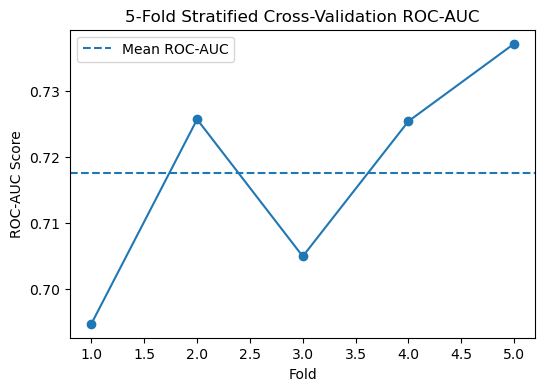

In [16]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.axhline(cv_scores.mean(), linestyle='--', label='Mean ROC-AUC')
plt.xlabel("Fold")
plt.ylabel("ROC-AUC Score")
plt.title("5-Fold Stratified Cross-Validation ROC-AUC")
plt.legend()
plt.show()


## Cross-Validation Analysis

### Q1: Why use cross-validation?
Cross-validation provides a more reliable estimate of model performance by evaluating it across multiple data splits. It reduces dependency on a single train-test split and helps detect overfitting.

### Q2: What is stratified k-fold?
Stratified k-fold ensures that each fold maintains the same proportion of churned and non-churned customers as the original dataset, which is important for imbalanced datasets.

### Q3: How do you interpret the results?
The mean cross-validation ROC-AUC score is close to the test set ROC-AUC, and the low standard deviation indicates that the model is stable and generalizes well.
